In [945]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.graphics.gofplots import qqplot
import seaborn as sns
import sklearn.metrics as skl
import statsmodels.api as sm
import statistics

In [946]:
# Читаем файл
data = pd.read_csv('anketolog_new.csv')

In [947]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 49 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                        Non-Null Count  Dtype  
---  ------                                                                                                                                                                                                                                                                                                                                                                        --------------  -----  
 0   ID ответа                                                                                           

In [948]:
data.head(15)

,ID ответа,Дата ответа,Затраченное время,Источник ответа,Источник ответа.1,Респондент,IP-hash,UA-hash,Логин,Где Вы работаете?,...,Отсутствие доступа к мировым рынкам и рейтингам,Нестабильность и невозможность планирования,"Вариант ""другое"".1","Вариант ""затрудняюсь ответить"".1","* Ощущаете ли Вы, что покупательская способность населения России значительно снизилась в 2022–2023 годах?",* Как проходит реализация зеленой маркетинговой стратегии в вашей компании?,"* Есть ли у вас определенные метрики, KPI и показатели, по которым вы оцениваете успешность зеленой маркетинговой стратегии?",* Присутствуют ли в ваших FMCG продуктах большое количество различных эко элементов?,* Какую ориентировочно стратегию зеленого маркетинга реализует ваша FMCG компания?,* Оцените лично ваш уровень заинтересованности и вовлеченности в зеленые и устойчивые практики?
0,67048821,2023.03.25 00:13,00:01:10,Прямая ссылка,Прямая ссылка,NaN,SBSQSDJYMB7ULOY3,XDTFNAMZO8OJ1CW6,NaN,"В филиале зарубежной компании или в компании, ...",...,NaN,Нестабильность и невозможность планирования,NaN,NaN,Скорее да,"Сложно сказать, не слишком быстро, и не слишко...","Да, у нас есть четкие индикаторы и метрики, вс...",Скорее да,Продвинутую. Активно трансформируем многие про...,Высокий
1,67048789,2023.03.25 00:10,00:02:59,Прямая ссылка,Прямая ссылка,NaN,SBSQSDJYMB7ULOY3,XDTFNAMZO8OJ1CW6,NaN,"В филиале зарубежной компании или в компании, ...",...,NaN,NaN,NaN,NaN,Скорее да,"Быстро, но некоторые трудности нас затормозили","Что-то измеряем, но не все",Скорее да,Продвинутую. Активно трансформируем многие про...,Высокий
2,67048753,2023.03.25 00:05,00:01:09,Прямая ссылка,Прямая ссылка,NaN,SBSQSDJYMB7ULOY3,XDTFNAMZO8OJ1CW6,NaN,"В филиале зарубежной компании или в компании, ...",...,NaN,Нестабильность и невозможность планирования,NaN,NaN,Скорее да,"Сложно сказать, не слишком быстро, и не слишко...","Что-то измеряем, но не все",Скорее да,Продвинутую. Активно трансформируем многие про...,Высокий
3,67048736,2023.03.25 00:02,00:02:04,Прямая ссылка,Прямая ссылка,NaN,SBSQSDJYMB7ULOY3,XDTFNAMZO8OJ1CW6,NaN,"В филиале зарубежной компании или в компании, ...",...,NaN,NaN,NaN,NaN,Скорее да,"Быстро, но некоторые трудности нас затормозили","Что-то измеряем, но не все",Да,Продвинутую. Активно трансформируем многие про...,Средний
4,67048676,2023.03.24 23:56,00:01:11,Прямая ссылка,Прямая ссылка,NaN,SBSQSDJYMB7ULOY3,XDTFNAMZO8OJ1CW6,NaN,"В филиале зарубежной компании или в компании, ...",...,NaN,NaN,NaN,NaN,Скорее да,"Сложно сказать, не слишком быстро, и не слишко...","Что-то измеряем, но не все",Скорее нет,Среднюю. Реализуем некоторые экологичные проек...,Средний
5,67048646,2023.03.24 23:52,00:01:03,Прямая ссылка,Прямая ссылка,NaN,SBSQSDJYMB7ULOY3,XDTFNAMZO8OJ1CW6,NaN,"В филиале зарубежной компании или в компании, ...",...,NaN,NaN,NaN,NaN,Да,"Быстро, но некоторые трудности нас затормозили","Что-то измеряем, но не все",Да,Продвинутую. Активно трансформируем многие про...,Высокий
6,67008258,2023.03.23 22:13,00:01:32,Прямая ссылка,Прямая ссылка,NaN,SBSQSDJYMB7ULOY3,XDTFNAMZO8OJ1CW6,NaN,"В филиале зарубежной компании или в компании, ...",...,NaN,Нестабильность и невозможность планирования,NaN,NaN,Скорее да,"Быстро, но некоторые трудности нас затормозили","Что-то измеряем, но не все",Скорее да,Экспертную. Полная трансформация всех процессо...,Высокий
7,67008230,2023.03.23 22:11,00:02:01,Прямая ссылка,Прямая ссылка,NaN,SBSQSDJYMB7ULOY3,XDTFNAMZO8OJ1CW6,NaN,В российской компании,...,NaN,Нестабильность и невозможность планирования,NaN,NaN,Скорее да,"Сложно сказать, не слишком быстро, и не слишко...","Есть на уровне обычного перфоманс маркетинга, ...",Нет,Среднюю. Реализуем некоторые экологичные проек...,Высокий
8,66900020,2023.03.21 13:15,00:01:08,Прямая ссылка,Прямая ссылка,USERID: 31671599,NSKAQPPHIMBTSPO3,QF39GJBJRVBXSURH,NaN,"В филиале зарубежной компании или в компании, ...",...,NaN,NaN,NaN,NaN,Скорее да,"Довольно быстро и эффективно, с большими пробл...","Да, у нас есть четкие индикаторы и метрики, в

После ручной обработки заголовков все ранво таблица выглядит сложно и не очень удобно для аналитической работы с ней, поэтому первой задачей будет стоять - приведение данных к удобной форме для работы с ними.

## Приведение и предобрабокта данных

Первым делом думаю можно удалить следующие столбцы, потому что для нашего исследования они не несут никакой значисомсти:
Дата ответа, Затраченное время, Источник ответа, Источник ответа.1, Респондент, IP-hash, UA-hash, Логин

In [949]:
data = data.drop(['Дата ответа', 'Затраченное время', 'Источник ответа', 'Источник ответа.1', 'Респондент', 'IP-hash', 'UA-hash', 'Логин'], axis=1)
data.head()

,ID ответа,Где Вы работаете?,В какой компании Вы работаете?,Какую должность Вы занимаете?,Оцените уровень заинтересованности и вовлеченности сотрудников вашей компании в зеленые и устойчивые практики?,"*Назовите причины, из-за которых Вы начали разрабатывать и внедрять зеленую маркетинговую стратегию в Вашей компании/бренде? Экологичность- популярный тренд",Увеличение динамики продаж,Оптимизация производство,Имидж и репутация среди стэйкхолдеров,"Вариант ""другое""",...,Отсутствие доступа к мировым рынкам и рейтингам,Нестабильность и невозможность планирования,"Вариант ""другое"".1","Вариант ""затрудняюсь ответить"".1","* Ощущаете ли Вы, что покупательская способность населения России значительно снизилась в 2022–2023 годах?",* Как проходит реализация зеленой маркетинговой стратегии в вашей компании?,"* Есть ли у вас определенные метрики, KPI и показатели, по которым вы оцениваете успешность зеленой маркетинговой стратегии?",* Присутствуют ли в ваших FMCG продуктах большое количество различных эко элементов?,* Какую ориентировочно стратегию зеленого маркетинга реализует ваша FMCG компания?,* Оцените лично ваш уровень заинтересованности и вовлеченности в зеленые и устойчивые практики?
0,67048821,"В филиале зарубежной компании или в компании, ...",Unilever,Junior,Высокий,NaN,NaN,Оптимизация производство,Имидж и репутация среди стэйкхолдеров,NaN,...,NaN,Нестабильность и невозможность планирования,NaN,NaN,Скорее да,"Сложно сказать, не слишком быстро, и не слишко...","Да, у нас есть четкие индикаторы и метрики, вс...",Скорее да,Продвинутую. Активно трансформируем многие про...,Высокий
1,67048789,"В филиале зарубежной компании или в компании, ...",Loreal,Senior,Высокий,Экологичность- популярный тренд,Увеличение динамики продаж,Оптимизация производство,Имидж и репутация среди стэйкхолдеров,NaN,...,NaN,NaN,NaN,NaN,Скорее да,"Быстро, но некоторые трудности нас затормозили","Что-то измеряем, но не все",Скорее да,Продвинутую. Активно трансформируем многие про...,Высокий
2,67048753,"В филиале зарубежной компании или в компании, ...",Loreal,Junior,Высокий,Экологичность- популярный тренд,Увеличение динамики продаж,Оптимизация производство,Имидж и репутация среди стэйкхолдеров,NaN,...,NaN,Нестабильность и невозможность планирования,NaN,NaN,Скорее да,"Сложно сказать, не слишком быстро, и не слишко...","Что-то измеряем, но не все",Скорее да,Продвинутую. Активно трансформируем многие про...,Высокий
3,67048736,"В филиале зарубежной компании или в компании, ...",Loreal,Middle,Высокий,Экологичность- популярный тренд,Увеличение динамики продаж,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Скорее да,"Быстро, но некоторые трудности нас затормозили","Что-то измеряем, но не все",Да,Продвинутую. Активно трансформируем многие про...,Средний
4,67048676,"В филиале зарубежной компании или в компании, ...",Henkel,Junior,Средний,Экологичность- популярный тренд,Увеличение динамики продаж,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Скорее да,"Сложно сказать, не слишком быстро, и не слишко...","Что-то измеряем, но не все",Скорее нет,Среднюю. Реализуем некоторые экологичные проек...,Средний


Теперь начнем по столбцу сокращать и преобразовывать данные: названия столбцов и их значения - опять же для упрощения работы с ними.

In [950]:
data.rename(columns = {'ID ответа':'answer_ID', 'Где Вы работаете?': 'workplace', 
                              'В какой компании Вы работаете?': 'company',
                             'Какую должность Вы занимаете?': 'job_level',
                      'Оцените уровень заинтересованности и вовлеченности сотрудников вашей компании в зеленые и устойчивые практики?': 'lvl_of_emp_int'}, inplace = True)
# data.head()

In [951]:
data['workplace'].value_counts()
pd.unique(data['workplace'])

array(['В филиале зарубежной компании или в компании, которая в течение последнего года отделилась от зарубежного главного офиса',
       'В российской компании'], dtype=object)

Заменим так же сразу значения в колонке "Где вы работаете" на более упрощенные - 'russian company', если "В российской компании" и 'non-russian company' если "В филиале зарубежной компании или в компании, которая в течение последнего года отделилась от зарубежного главного офиса"

In [952]:
data['workplace'] = data['workplace'].apply(lambda x: 'russian company' if x == 'В российской компании' else 'non-russian company')
data['workplace'].value_counts()

non-russian company    58
russian company        50
Name: workplace, dtype: int64

Далее идет вопрос с множественным выбором, который разделен на отдельные колонки, предлагаю переименовать вопросы и добавить колонку с объединенными ответами из разных колонок в один ответ в виде списка для каждого респондента.

In [953]:

data.head()
data.rename(columns={'*Назовите причины, из-за которых Вы начали разрабатывать и внедрять зеленую маркетинговую стратегию в Вашей компании/бренде? Экологичность- популярный тренд': 'Q1.1',
                    'Увеличение динамики продаж': 'Q1.2',
                    'Оптимизация производство': 'Q1.3',
                    'Имидж и репутация среди стэйкхолдеров': 'Q1.4',
                    'Вариант "другое"': 'Q1.5',
                    'Вариант "затрудняюсь ответить"': 'Q1.6'}, inplace=True)
def q1(row):
    total = []
    sp = ['Q1.1', 'Q1.2', 'Q1.3', 'Q1.4', 'Q1.5', 'Q1.6']
    for i in range(6):
        if isinstance(row[sp[i]], str):
            total.append(row[sp[i]])
    return total  
data['reasons_of_deploy (Q1)'] = data.apply(q1, axis=1)
# data.head()

По такой же схеме переделываем остальные вопросы

In [954]:
data.rename(columns={'Ваша зеленая маркетинговая стратегия и ориентация на устойчивое развитие помогли увеличить продажи и маржинальность FMCG продуктов?': 'Q2',
                    'Ваша зеленая маркетинговая стратегия и ориентация на устойчивое развитие помогли улучшить имидж и репутацию компании/брендов/продуктов?': 'Q3',
                    'На каком уровне реализации зеленой маркетинговой стратегии находится Ваша компания?': 'Q4',
                    'Считаете ли Вы, что зеленую маркетинговую стратегию вашей компании можно назвать успешной?': 'Q5',
                    '* По вашему мнению, наиболее существенными и значимыми факторами, влияющими на увеличение прибыли в рамках зеленой маркетинговой стратегии в FMCG компании после трех лет ее реализации, являются (где 1- совсем не влияет, а 5- сильно влияет)?  Использование переработанного пластика в упаковках и полный переход на более экологичные источники сырья в FMCG продуктах ': 'Q6.1',
                    'Уменьшение выбросов CO2 минимум на 50% на всей цепочке создания ценности продуктов': 'Q6.2',
                    'Зеленое производство, сертифицированное по LEED, ISO и другим экологическим сертификатам соответствия': 'Q6.3',
                    'Простая и понятная коммуникация компании в упаковке и рекламных кампаниях об экологичности продукта, его использовании, переработке, утилизации для потребителей': 'Q6.4',
                    'Экомаркировки продуктов': 'Q6.5',
                    'Конкурентноспособная цена зеленого продукта': 'Q6.6',
                    'Наличие минимум 90% натуральных компонентов в составе продуктов': 'Q6.7',
                    'Полная локальность FMCG продукта': 'Q6.8',
                    'Бюджеты на трансформацию и активации зеленого маркетинга, составляющие более 15% от основного годового маркетингового бюджета': 'Q6.9',
                    'Наличие подробной системы гайдлайнов и инструкций по реализации зеленых маркетинговых стратегий у маркетинговой команды': 'Q6.10'}, inplace=True)



In [955]:
data.rename(columns={'* Привлекаете ли Вы различных экспертов и других стэйкхолдеров для помощи в реализации зеленой маркетинговой стратегии вашей компании?': 'Q7',
                    '*Оцените как новая политическая и экономическая реальность в России повлияли на интеграцию устойчивых практик в вашей компании?': 'Q8',
                    '* Какие факторы новой политической и экономической реальности сильнее всего повлияли на зеленую маркетинговую стратегию в Вашей компании? Снижение покупательской способности': 'Q9.1',
                    'Урезание маркетинговых бюджетов': 'Q9.2',
                    'Переключение акцента компании на другие направления': 'Q9.3',
                    'Уход зарубежных партнёров и глобальных офисов': 'Q9.4',
                    'Отсутствие доступа к мировым рынкам и рейтингам': 'Q9.5',
                    'Нестабильность и невозможность планирования': 'Q9.6',
                    'Вариант "другое".1': 'Q9.7',
                    'Вариант "затрудняюсь ответить".1': 'Q9.8',
                    '* Ощущаете ли Вы, что покупательская способность населения России значительно снизилась в 2022–2023 годах?': 'Q10',
                    '* Как проходит реализация зеленой маркетинговой стратегии в вашей компании?': 'Q11',
                    '* Есть ли у вас определенные метрики, KPI и показатели, по которым вы оцениваете успешность зеленой маркетинговой стратегии?': 'Q12',
                    '* Присутствуют ли в ваших FMCG продуктах большое количество различных эко элементов?': 'Q13',
                    '* Какую ориентировочно стратегию зеленого маркетинга реализует ваша FMCG компания?': 'Q14',
                    '* Оцените лично ваш уровень заинтересованности и вовлеченности в зеленые и устойчивые практики?': 'Q15'}, inplace=True)



In [956]:
# Проверяем все ли верно получилось
data.columns

Index(['answer_ID', 'workplace', 'company', 'job_level', 'lvl_of_emp_int',
       'Q1.1', 'Q1.2', 'Q1.3', 'Q1.4', 'Q1.5', 'Q1.6', 'Q2', 'Q3', 'Q4', 'Q5',
       'Q6.1', 'Q6.2', 'Q6.3', 'Q6.4', 'Q6.5', 'Q6.6', 'Q6.7', 'Q6.8', 'Q6.9',
       'Q6.10', 'Q7', 'Q8', 'Q9.1', 'Q9.2', 'Q9.3', 'Q9.4', 'Q9.5', 'Q9.6',
       'Q9.7', 'Q9.8', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15',
       'reasons_of_deploy (Q1)'],
      dtype='object')

In [957]:
data['Q2'].value_counts()

Скорее да               44
Да                      33
Скорее нет              22
Затрудняюсь ответить     5
Не повлияли              3
Нет                      1
Name: Q2, dtype: int64

#### Итого мы имеем (Кодировка вопроса - расшифровка вопроса)

* Q1 - Назовите причины, из-за которых Вы начали разрабатывать и внедрять зеленую маркетинговую стратегию в Вашей компании/бренде?
** Q1.1 - Экологичность - популярный тренд
** Q1.2 - Увеличение динамики продаж
** Q1.3 - Оптимизация производство
** Q1.4 - Имидж и репутация среди стэйкхолдеров
** Q1.5 - Вариант "другое"
** Q1.6 - Вариант "затрудняюсь ответить"
* Q2 - Ваша зеленая маркетинговая стратегия и ориентация на устойчивое развитие помогли увеличить продажи и маржинальность FMCG продуктов?
* Q3 - Ваша зеленая маркетинговая стратегия и ориентация на устойчивое развитие помогли улучшить имидж и репутацию компании/брендов/продуктов?
* Q4 - На каком уровне реализации зеленой маркетинговой стратегии находится Ваша компания?
* Q5 - Считаете ли Вы, что зеленую маркетинговую стратегию вашей компании можно назвать успешной?
* Q6 - По вашему мнению, наиболее существенными и значимыми факторами, влияющими на увеличение прибыли в рамках зеленой маркетинговой стратегии в FMCG компании после трех лет ее реализации, являются (где 1- совсем не влияет, а 5- сильно влияет)?
** Q6.1 - Использование переработанного пластика в упаковках и полный переход на более экологичные источники сырья в FMCG продуктах
** Q6.2 - Уменьшение выбросов CO2 минимум на 50% на всей цепочке создания ценности продуктов
** Q6.3 - Зеленое производство, сертифицированное по LEED, ISO и другим экологическим сертификатам соответствия
** Q6.4 - Простая и понятная коммуникация компании в упаковке и рекламных кампаниях об экологичности продукта, его использовании, переработке, утилизации для потребителей
** Q6.5 - Экомаркировки продуктов
** Q6.6 - Конкурентноспособная цена зеленого продукта
** Q6.7 - Наличие минимум 90% натуральных компонентов в составе продуктов
** Q6.8 - Полная локальность FMCG продукта
** Q6.9 - Бюджеты на трансформацию и активации зеленого маркетинга, составляющие более 15% от основного годового маркетингового бюджета
** Q6.10 - Наличие подробной системы гайдлайнов и инструкций по реализации зеленых маркетинговых стратегий у маркетинговой команды
* Q7 - Привлекаете ли Вы различных экспертов и других стэйкхолдеров для помощи в реализации зеленой маркетинговой стратегии вашей компании?	
* Q8 - Оцените как новая политическая и экономическая реальность в России повлияли на интеграцию устойчивых практик в вашей компании?
* Q9 - Какие факторы новой политической и экономической реальности сильнее всего повлияли на зеленую маркетинговую стратегию в Вашей компании? 
** Q9.1 - Снижение покупательской способности
** Q9.2 - Урезание маркетинговых бюджетов
** Q9.3 - Переключение акцента компании на другие направления
** Q9.4 - Уход зарубежных партнёров и глобальных офисов
** Q9.5 - Отсутствие доступа к мировым рынкам и рейтингам
** Q9.6 - Нестабильность и невозможность планирования
** Q9.7 - Вариант "другое"
** Q9.8 - Вариант "затрудняюсь ответить"
* Q10 - Ощущаете ли Вы, что покупательская способность населения России значительно снизилась в 2022–2023 годах?
* Q11 - Как проходит реализация зеленой маркетинговой стратегии в вашей компании?
* Q12 - Есть ли у вас определенные метрики, KPI и показатели, по которым вы оцениваете успешность зеленой маркетинговой стратегии?
* Q13 - Присутствуют ли в ваших FMCG продуктах большое количество различных эко элементов?
* Q14 - Какую ориентировочно стратегию зеленого маркетинга реализует ваша FMCG компания?
* Q15 - Оцените лично ваш уровень заинтересованности и вовлеченности в зеленые и устойчивые практики?

In [958]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   answer_ID               108 non-null    int64  
 1   workplace               108 non-null    object 
 2   company                 108 non-null    object 
 3   job_level               108 non-null    object 
 4   lvl_of_emp_int          108 non-null    object 
 5   Q1.1                    59 non-null     object 
 6   Q1.2                    57 non-null     object 
 7   Q1.3                    44 non-null     object 
 8   Q1.4                    27 non-null     object 
 9   Q1.5                    0 non-null      float64
 10  Q1.6                    2 non-null      object 
 11  Q2                      108 non-null    object 
 12  Q3                      108 non-null    object 
 13  Q4                      108 non-null    object 
 14  Q5                      108 non-null    ob

На первый взгляд с данными все хорошо. Есть столбцы с пропусками, но эти пропуски вызваны больше тем, что не последовало ответа на поставленный вопрос. 

## Дескриптивный анализ

Изучим количественыне данные

In [959]:
data.describe()

,answer_ID,Q1.5,Q6.1,Q6.2,Q6.3,Q6.4,Q6.5,Q6.6,Q6.7,Q6.8,Q6.9,Q6.10,Q9.7,Q9.8
count,1.080000e+02,0.0,108.000000,107.000000,104.000000,108.000000,107.000000,108.000000,108.000000,107.000000,108.000000,108.000000,0.0,0.0
mean,6.675911e+07,NaN,4.055556,4.037383,3.971154,2.796296,3.859813,3.500000,3.564815,2.841121,3.287037,3.805556,NaN,NaN
std,1.453380e+05,NaN,0.974759,0.960790,0.929106,1.056880,0.975633,0.932287,1.170295,1.100168,0.967229,1.241482,NaN,NaN
min,6.659766e+07,NaN,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN
25%,6.661158e+07,NaN,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,NaN,NaN
50%,6.682443e+07,NaN,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,NaN,NaN
75%,6.687307e+07,NaN,5.000000,5.000000,5.000000,3.000000,5.000000,4.000000,5.000000,4.000000,4.000000,5.000000,NaN,NaN
max,6.704882e+07,NaN,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,NaN,NaN


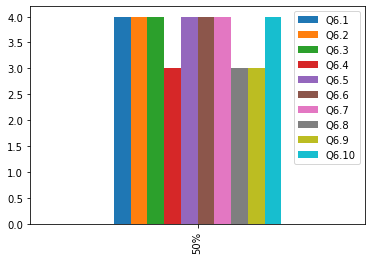

In [960]:
data1 = data.describe().loc[['50%'], ['Q6.1', 'Q6.2', 'Q6.3', 'Q6.4', 'Q6.5', 'Q6.6', 'Q6.7', 'Q6.8', 'Q6.9', 'Q6.10']].plot(kind='bar')

По данной таблице можем сказать следующее:

1. По мнению респондентов, использование переработанного пластика в упаковках и полный переход на более экологичные источники сырья в FMCG продуктах; уменьшение выбросов CO2 минимум на 50% на всей цепочке создания ценности продуктов; зеленое производство, сертифицированное по LEED, ISO и другим экологическим сертификатам соответствия; экомаркировки продуктов; конкурентноспособная цена зеленого продукта; наличие минимум 90% натуральных компонентов в составе продуктов; наличие подробной системы гайдлайнов и инструкций по реализации зеленых маркетинговых стратегий у маркетинговой команды - все эти факторы СИЛЬНО влияют на увеличение прибыли, так как медианный ответ по этому вопросу равен 4 (влияет).
2. Так же по мнению респондентов, простая и понятная коммуникация компании в упаковке и рекламных кампаниях об экологичности продукта, его использовании, переработке, утилизации для потребителей; полная локальность FMCG продукта; бюджеты на трансформацию и активации зеленого маркетинга, составляющие более 15% от основного годового маркетингового бюджета - оказывают среднее влияние на увеличение прибыли - медианное значение 3.
3. Если смотреть по значениею "среднего", то самый высокий показатель у "использование переработанного пластика в упаковках и полный переход на более экологичные источники сырья в FMCG продуктах" - 4.055. То есть, можно сказать, многие респонденты оценили данный пункт выше чем какой-либо другой. 
4. И наоборот самый "малозначимый" пункт из тех, что выбрали респонденты - "Простая и понятная коммуникация компании в упаковке и рекламных кампаниях об экологичности продукта, его использовании, переработке, утилизации для потребителей".

Теперь изучим категориальные значения

<AxesSubplot:ylabel='dsd'>

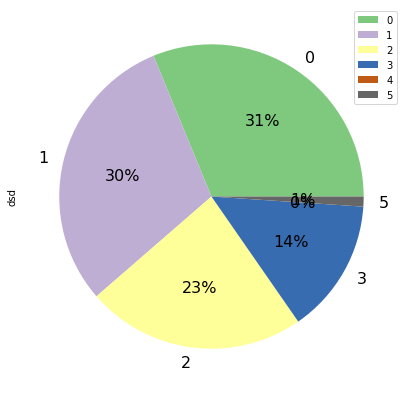

In [961]:
# Начнем с 1ого вопроса: 
    # Назовите причины, из-за которых Вы начали разрабатывать и внедрять зеленую маркетинговую стратегию в Вашей компании/бренде?
    
sp = ['Q1.1', 'Q1.2', 'Q1.3', 'Q1.4', 'Q1.5', 'Q1.6']
sp2 = []
for i in sp:
    sp2.append(data[i].count())
sp2

data_q1 = pd.DataFrame({'#question': ['Q1.1', 'Q1.2', 'Q1.3', 'Q1.4', 'Q1.5', 'Q1.6'], 'questions Q1': sp2})
data_q1.plot(
    y='questions Q1', 
    kind='pie', 
    autopct='%1.0f%%', 
    figsize=(7,7),
    ylabel= 'dsd',
    colormap='Accent',
    fontsize=16
)

Итак, видим, что ббольше половины респондентов указали, что причина из-за которых они начали разрабатывать и внедрять зеленую маркетинговую стратегию в их компании/бренде:
* 1 место - экологичность популярный бренд
* 2 место - увеличение данамики продаж
* 3 место - оптимизация прозводства
* 4 место - имидж и репутация среди стэйкхолдеров
* 5 и 6 места - вариант "другое" и вариант "затрудняюсь ответить"

Переведем ответы в виде строкового значения в вопросах Q6 в бинарный, то есть 0 или 1.
1) создадим отдельный датасет, с зависимой переменной и независимыми
2) изучим датасет на наличие пропусков и выбросов

In [962]:
data_model = data[['Q2', 'Q6.1', 'Q6.2', 'Q6.3', 'Q6.4', 'Q6.5', 'Q6.6', 'Q6.7', 'Q6.8', 'Q6.9', 'Q6.10']].copy()
data_model.head()
data_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Q2      108 non-null    object 
 1   Q6.1    108 non-null    int64  
 2   Q6.2    107 non-null    float64
 3   Q6.3    104 non-null    float64
 4   Q6.4    108 non-null    int64  
 5   Q6.5    107 non-null    float64
 6   Q6.6    108 non-null    int64  
 7   Q6.7    108 non-null    int64  
 8   Q6.8    107 non-null    float64
 9   Q6.9    108 non-null    int64  
 10  Q6.10   108 non-null    int64  
dtypes: float64(4), int64(6), object(1)
memory usage: 9.4+ KB


2) Проверим на наличие пропусков и уберем их, если количество-незначительно

In [963]:
data_model.isnull().sum()
data_model = data_model.dropna(subset=['Q6.2', 'Q6.3', 'Q6.5', 'Q6.8'])
data_model.isnull().sum()
print(data_model.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 0 to 107
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Q2      101 non-null    object 
 1   Q6.1    101 non-null    int64  
 2   Q6.2    101 non-null    float64
 3   Q6.3    101 non-null    float64
 4   Q6.4    101 non-null    int64  
 5   Q6.5    101 non-null    float64
 6   Q6.6    101 non-null    int64  
 7   Q6.7    101 non-null    int64  
 8   Q6.8    101 non-null    float64
 9   Q6.9    101 non-null    int64  
 10  Q6.10   101 non-null    int64  
dtypes: float64(4), int64(6), object(1)
memory usage: 9.5+ KB
None


Убрали 7 строк с пропусками в разных вопросов, но зато теперь уверены что данные полностью заполнены

3) Создадим новый столбец с числовой градацией значений. Для этого создадим собственную функцию и применим ее к столбцу Q2.

In [964]:
data_model['Q2'].unique()

array(['Скорее да', 'Не повлияли', 'Да', 'Нет', 'Скорее нет',
       'Затрудняюсь ответить'], dtype=object)

In [965]:
def to_num(a):
    if a == 'Да':
        return 5
    elif a == 'Скорее да':
        return 4
    elif a == 'Затрудняюсь ответить':
        return 3
    elif a == 'Не повлияли' or a == 'Нет':
        return 1
    elif a == 'Скорее нет':
        return 2
    
data_model['new_Q2'] = data_model['Q2'].apply(to_num)
data_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 0 to 107
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Q2      101 non-null    object 
 1   Q6.1    101 non-null    int64  
 2   Q6.2    101 non-null    float64
 3   Q6.3    101 non-null    float64
 4   Q6.4    101 non-null    int64  
 5   Q6.5    101 non-null    float64
 6   Q6.6    101 non-null    int64  
 7   Q6.7    101 non-null    int64  
 8   Q6.8    101 non-null    float64
 9   Q6.9    101 non-null    int64  
 10  Q6.10   101 non-null    int64  
 11  new_Q2  101 non-null    int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 10.3+ KB


**Здесь шаманим данные для столбца new_Q2. Просто заполняем его средним значением по всем 10 независимым вопросам и округляем до целого, таким образом получим ту же самую градацию от 1 до 5.**

In [966]:
data_model['new_Q2'] = data_model[['Q6.1', 'Q6.2', 'Q6.3', 'Q6.4', 'Q6.5', 'Q6.6', 'Q6.7', 'Q6.8', 'Q6.9', 'Q6.10']].mean(axis=1).round()
#data_model['111'] = data_model['111'].apply(lambda x: round(x + random.uniform(0, 0.136)))

4) Теперь изучим новый датасет на выбросы

In [967]:
data_model.describe()

,Q6.1,Q6.2,Q6.3,Q6.4,Q6.5,Q6.6,Q6.7,Q6.8,Q6.9,Q6.10,new_Q2
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,4.029703,4.019802,3.960396,2.712871,3.930693,3.455446,3.594059,2.821782,3.306931,3.811881,3.475248
std,0.994540,0.969332,0.937238,1.013278,0.908377,0.933003,1.184721,1.108116,0.966877,1.262639,0.701342
min,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000
50%,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000
75%,5.000000,5.000000,5.000000,3.000000,5.000000,4.000000,5.000000,4.000000,4.000000,5.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000


Данные прекрасны - выбросов нет, по всем столбцам у нас максимальное значение - 5, а минимальное значение 1, а где-то 2, что тоже приемлимо

5) Теперь изучим наши независимые переменные на мультиколлинеарность и построим тепловую карту

In [968]:
data_model.corr()

,Q6.1,Q6.2,Q6.3,Q6.4,Q6.5,Q6.6,Q6.7,Q6.8,Q6.9,Q6.10,new_Q2
Q6.1,1.000000,0.808480,0.677153,0.266549,0.345443,0.243921,0.511078,0.068368,0.385600,0.267287,0.581699
Q6.2,0.808480,1.000000,0.694326,0.240014,0.410424,0.266358,0.512126,0.115036,0.302874,0.240018,0.603817
Q6.3,0.677153,0.694326,1.000000,0.198503,0.407848,0.238114,0.480708,0.224223,0.388744,0.492207,0.622234
Q6.4,0.266549,0.240014,0.198503,1.000000,0.347553,0.361839,0.360095,0.354744,0.346029,0.207476,0.630154
Q6.5,0.345443,0.410424,0.407848,0.347553,1.000000,0.250002,0.345283,0.077017,0.263564,0.345988,0.507418
Q6.6,0.243921,0.266358,0.238114,0.361839,0.250002,1.000000,0.349874,0.446843,0.397752,0.277183,0.567561
Q6.7,0.511078,0.512126,0.480708,0.360095,0.345283,0.349874,1.000000,0.150007,0.380488,0.329487,0.595564
Q6.8,0.068368,0.115036,0.224223,0.354744,0.077017,0.446843,0.150007,1.000000,0.331569,0.404630,0.547558
Q6.9,0.385600,0.302874,0.388744,0.346029,0.263564,0.397752,0.380488,0.331569,1.000000,0.440948,0.652803
Q6.10,0.267287,0.240018,0.492207,0.207476,0.345988,0.277183,0.329487,0.404630,0.440948,1.000000,0.564961


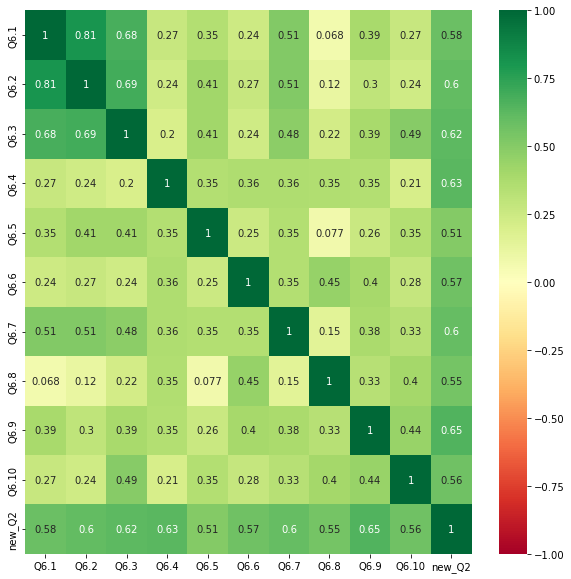

In [969]:
plt.figure(figsize = (10,10))
d1 = sns.heatmap(data_model.corr(), vmin = -1, vmax = 1, annot = True, cmap = 'RdYlGn')

Здесь мы видим, что вопросы Q6.1 и Q6.2 сильно коррелируюют межу собой. Коэффициент корреляции - 0.81. В идеале нам необходимо исключить одну из этих переменных. Исключим независимую переменную Q6.2.

6) Изучим нормальнотсь распределения для зависимых переменных

In [972]:
pvalues = []
for col in data_model.drop(['Q2', 'new_Q2'], axis=1).columns:
    x = data_model[col]
    # задаем параметры нормального распределения
    mean = x.mean()
    std = x.std()

    # применяем тест Колмогорова-Смирнова к данным и нормальному распределению
    kstest_result = kstest(x, norm(loc=mean, scale=std).cdf)

    # выводим p-value
    pvalues.append(kstest_result.pvalue)
    
questions = data_model.drop(['Q2', 'new_Q2'], axis=1).columns
dict_pvalues = {'Question':questions, 'Pvalue':pvalues}
data_pvalues = pd.DataFrame(dict_pvalues)
print(data_pvalues)

  Question    Pvalue
0     Q6.1  0.000031
1     Q6.2  0.000013
2     Q6.3  0.000027
3     Q6.4  0.000003
4     Q6.5  0.000377
5     Q6.6  0.000008
6     Q6.7  0.001288
7     Q6.8  0.000273
8     Q6.9  0.000243
9    Q6.10  0.000004


Из полученной таблицы видим, что все используемые переменные ненормальные (pvalue < 0,05), соответственно гипотеза H0 о нормальности данного распределения отвергается. Но конкретно для целей дальнейшего анализа мы можем позволить себе считать данное условие выполненным, так как пропусков в исследуемых данных нет.

7) Разделим данные на обучающую и тестовую выборки с помощью функции train_test_split() из библиотеки scikit-learn. Создадим экземпляр класса LinearRegression() из библиотеки scikit-learn. Обучим модель на обучающей выборке с помощью метода fit(). Сделаем прогнозы на тестовой выборке с помощью метода predict(). Оценим статистическую значимость коэффициентов модели и их влияние на зависимую переменную.

In [974]:
# определяем значения х и у
X = sm.add_constant(data_model.drop(['Q2', 'new_Q2', 'Q6.2'], axis=1))
y = data_model['new_Q2']

# Строим модель
model = sm.OLS(y, X)
res_mult = model.fit()
res_mult.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 new_Q2   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     62.58
Date:                Thu, 06 Apr 2023   Prob (F-statistic):           4.06e-35
Time:                        11:57:19   Log-Likelihood:                -7.3623
No. Observations:                 101   AIC:                             34.72
Df Residuals:                      91   BIC:                             60.88
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0592      0.162      0.365      0.716      -0.263       0.381
Q6.1           0.1119      0.041      2.736      0.007       0.031       0.193
Q6.3           0.1104      0.046      2.410      0.018       0.019       0.201
Q6.4           0.1788      0.033      5.442      0.000       0.114       0.244
Q6.5           0.0972      0.036      2.699      0.008       0.026       0.169
Q6.6           0.0891      0.036      2.473      0.015       0.018       0.161
Q6.7           0.0728      0.030      2.461      0.016       0.014       0.132
Q6.8           0.1418      0.031      4.511      0.000       0.079       0.204
Q6.9           0.1443      0.035      4.081      0.000       0.074       0.215
Q6.10          0.0561      0.028      1.982      0.051      -0.000       0.112
==============================================================================
Omnibus:                        1.220   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.543   Jarque-Bera (JB):                0.711
Skew:                           0.103   Prob(JB):                        0.701
Kurtosis:                       3.355   Cond. No.                         65.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Итак что мы имеем:
1) коэффициент детерминации хороший - 86%. То есть наша регрессионная модель описывает 85% данных

2) все значения, кроме 10ого вопроса - можно считать статистически значимыми, так как у всех p=value < 0.05. Но и 10ый вопрос не сильно далеко ушел, поэтому в целом, если взять другое пороговое значение, то 10ый вопрос тоже станет статистически значимым

3) Если изучить столбец t - то в нем мы можем увидеть значимость каждой независимой переменной на зависимую. Мы видим, что самыми значимыми вопросам являются 4 и 8. Это топ2.

4) Исходя из полученных значений, мы видим, что все пункт влияют на нашу зависимую переменную прямо пропорционально и итоговое уравнение имеет вид:

$$y = 0.0592 + 0.1119*x1 + 0.1104*x3 + 0.1788*x4 + 0.0972*x5 + 0.0891*x6 + 0.0728*x7 + 0.1418*x8 + 0.1443*x9 + 0.0561*x10$$

8) Проверим модель на новых данных и сделаем прогнозы. Оценим качество модели с помощью метрик, таких как MAE и среднеквадратичная ошибка (MSE).

In [975]:
# Рассчитаем новое значение для y по полученной модели
y_pr = res_mult.predict(X)

In [977]:
# MAE
print('MAE = %s' % skl.mean_absolute_error(y_pr,y))

# MSE
print('MSE = %s' % skl.mean_squared_error(y_pr,y))

variance = statistics.variance(y)

if skl.mean_absolute_error(y_pr,y) < variance:
    print('Good MAE')
else:
    print('Bad MAE')
    
if skl.mean_squared_error(y_pr,y) < variance:
    print('Good MSE')
else:
    print('Bad MSE')

MAE = 0.20451152774327092
MSE = 0.06773924717628761
Good MAE
Good MSE


Судя по полученным результатам оценки качества модели (MSE и MAE), мы видим, что модель достаточно хорошо себя проявила. Обычно приянто считать, что модель хорошая, если показатели MSE и MAE меньше чем дисперсия. Мы проверили и так оно и есть. 